<a href="https://colab.research.google.com/github/Randasabag/Projet-5-ML/blob/main/Copie_de_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime,date,timedelta
import datetime as dt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df=pd.read_csv('/content/drive/MyDrive/MACHINE_LEARNING/QueryResultsP5.csv', sep=',')
df.head()

,LastActivityDate,Title,Tags,Score
0,2022-08-29 20:14:36,Determine the type of an object?,<python><dictionary><types><typeof>,2164
1,2022-07-02 05:29:08,Why can't Python parse this JSON data?,<python><json><parsing>,1503
2,2023-11-20 22:23:13,Best way to convert string to bytes in Python 3?,<python><string><character-encoding><python-3.x>,1482
3,2022-11-09 15:44:56,Display number with leading zeros,<python><integer><string-formatting>,1419
4,2023-07-28 17:04:02,Create a Pandas Dataframe by appending one row...,<python><pandas><dataframe><append>,1399
5,2022-11-23 08:30:50,Should I use 'has_key()' or 'in' on Python dicts?,<python><dictionary>,1122
6,2022-08-15 07:57:04,How to check if type of a variable is string?,<python><string><variables><types>,1051
7,2023-01-27 10:02:02,Which exception should I raise on bad/illegal ...,<python><exception><arguments>,820
8,2022-05-31 17:20:40,Using @property versus getters and setters,<python><properties><getter-setter>,798
9,2023-01-29 17:03:17,"How can I check if a string represents an int,...",<python><string><integer>,733


In [3]:
print(df.shape)

(50, 4)


In [4]:
df.isnull().sum()

LastActivityDate    0
Title               0
Tags                0
Score               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

LastActivityDate    object
Title               object
Tags                object
Score                int64
dtype: object

In [8]:
df['Score'].value_counts()

Score
259     2
290     2
330     1
402     1
400     1
396     1
372     1
361     1
356     1
352     1
343     1
341     1
326     1
1503    1
320     1
309     1
303     1
284     1
277     1
270     1
264     1
262     1
260     1
404     1
2164    1
415     1
645     1
1482    1
1419    1
1399    1
1122    1
1051    1
820     1
798     1
733     1
702     1
625     1
426     1
553     1
550     1
525     1
512     1
489     1
475     1
447     1
440     1
430     1
409     1
Name: count, dtype: int64

In [10]:
#Résumé stat
df.describe(include="all").round(2)

,LastActivityDate,Title,Tags,Score
count,50,50,50,50.00
unique,50,50,47,NaN
top,2022-08-29 20:14:36,Determine the type of an object?,<python>,NaN
freq,1,1,3,NaN
mean,NaN,NaN,NaN,563.28
std,NaN,NaN,NaN,406.65
min,NaN,NaN,NaN,259.00
25%,NaN,NaN,NaN,321.50
50%,NaN,NaN,NaN,406.50
75%,NaN,NaN,NaN,607.00


In [11]:
df.columns

Index(['LastActivityDate', 'Title', 'Tags', 'Score'], dtype='object')

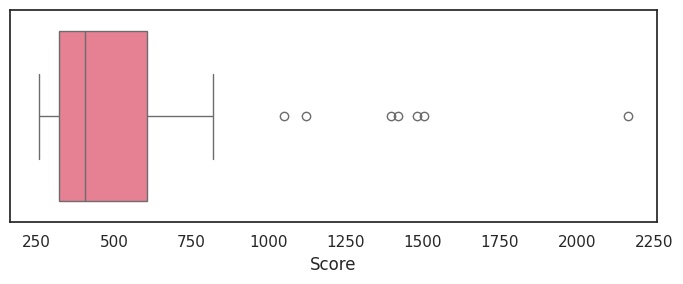

In [13]:
#Visualisation des outliers
plt.figure(figsize=(7, 3))
sns.set(style="white", palette="husl")
sns.boxplot(data=df, x='Score')

#Espacement entre les graphiques
plt.tight_layout()

plt.savefig("boxplots_outliers.png")

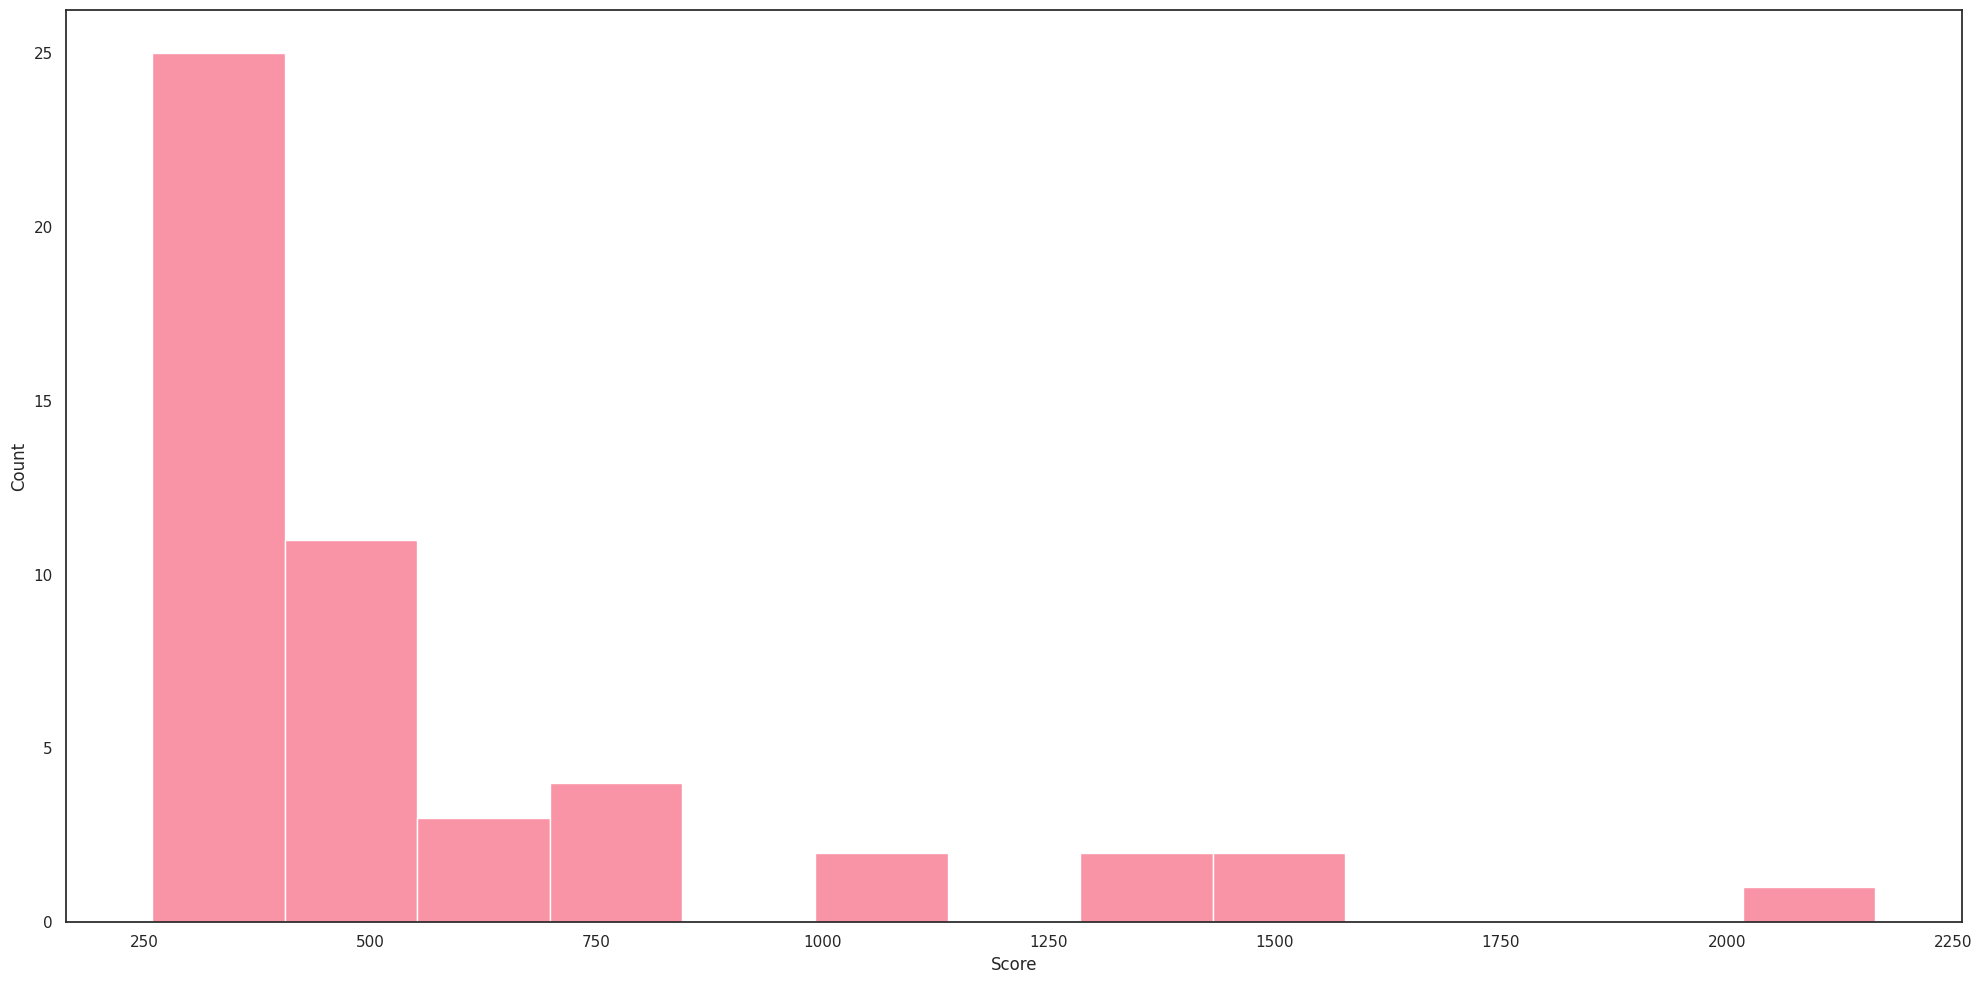

In [14]:
#Visualisation des histogrammes de la variable Score
plt.figure(figsize=(20, 10))
sns.set(style="white", palette="husl")
sns.histplot(data=df, x='Score')

#Espacement entre les graphiques
plt.tight_layout()

plt.savefig("hist.png")